## RNA (26 баллов)
Напишите программу, реализующую алгоритм Нуссинов, получающий вторичную структуру последовательности РНК с максимальным количеством спаренных оснований. 
Минимальный размер шпильки - 3. 
Вывод может быть как графический, так и представлять собой просто список спаренных оснований.

In [1]:
# pattern matching library for nicer answer recovery
from pampy import match, _

# for visualization
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
is_pair = lambda n1, n2: \
        (n1 == 'A' and n2 == 'U') or (n1 == 'U' and n2 == 'A') or (n1 == 'G' and n2 == 'C') or (n1 == 'C' and n2 == 'G')

def recover_answer(p, rna):
    rec = lambda i, j: match(p[i][j],
        (int, int),               lambda pi, pj:             rec(pi,  pj ) | ({(i, j)} if (i + 1, j - 1) == (pi, pj) else set()),
        ((int, int), (int, int)), lambda p1i, p1j, p2i, p2j: rec(p1i, p1j) | rec(p2i, p2j),
        _,                        lambda _: set(),
    )
    return rec(0, len(rna) - 1)


def draw_answer(rna, pairs):
    g = nx.Graph()
    g.add_nodes_from([f'{i}:{n}' for i,n in enumerate(rna)])
    g.add_edges_from([(f'{s}:{rna[s]}', f'{e}:{rna[e]}') for s, e in pairs])
    nx.draw(g, nx.circular_layout(g), alpha=0.5, node_color='white', edge_color='blue', with_labels=True)
    plt.axis('equal')
    plt.show()
    

def rna_secondary_structure(rna, min_stem_loop=3):
    n = len(rna)
    
    # initialize
    s = [[-1 for _ in range(n)] for _ in range(n)]
    p = [[-1 for _ in range(n)] for _ in range(n)]
    
    # lazy dynamic
    def rec(i, j):
        if j - i <= min_stem_loop: return 0
        if s[i][j] != -1: return s[i][j]
        # vertical
        if rec(i + 1, j) > s[i][j]:
            p[i][j] = (i + 1, j)
            s[i][j] = rec(i + 1, j)
        # horizontal
        if rec(i, j - 1) > s[i][j]:
            p[i][j] = (i, j - 1)
            s[i][j] = rec(i, j - 1)
        # diagonal
        if is_pair(rna[i], rna[j]) and rec(i + 1, j - 1) + 1 > s[i][j]:
            p[i][j] = (i + 1, j - 1)
            s[i][j] = rec(i + 1, j - 1) + 1
        # merging
        for k in (i + 1, j):
            if rec(i, k) + rec(k + 1, j) > s[i][j]:
                p[i][j] = ((i, k), (k + 1, j))
                s[i][j] = rec(i, k) + rec(k + 1, j)
        return s[i][j]
            
    print('Number of paired bases:', rec(0, n - 1))
    pairs = recover_answer(p, rna)
    draw_answer(rna, pairs)
    

### Тест 1. GGACC
Ожидаемое число спаренных оснований - 1.

Number of paired bases: 1


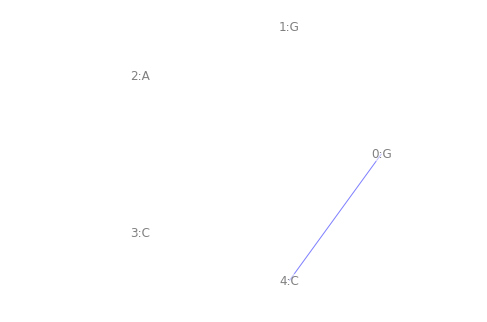

In [3]:
rna_secondary_structure('GGACC')

### Тест 2. AAACAUGAGGAUUACCCAUGU
Ожидаемое число спаренных оснований - 7.

Number of paired bases: 7


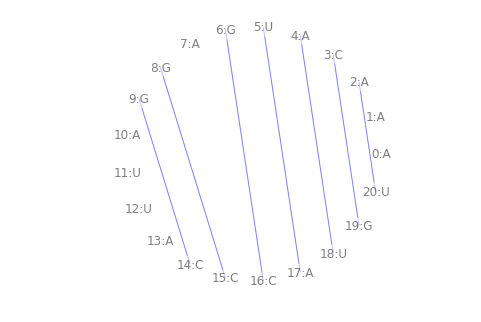

In [4]:
rna_secondary_structure('AAACAUGAGGAUUACCCAUGU')
